In [29]:
import pandas as pd
import mlxtend
import numpy as np
import seaborn as sns
import re

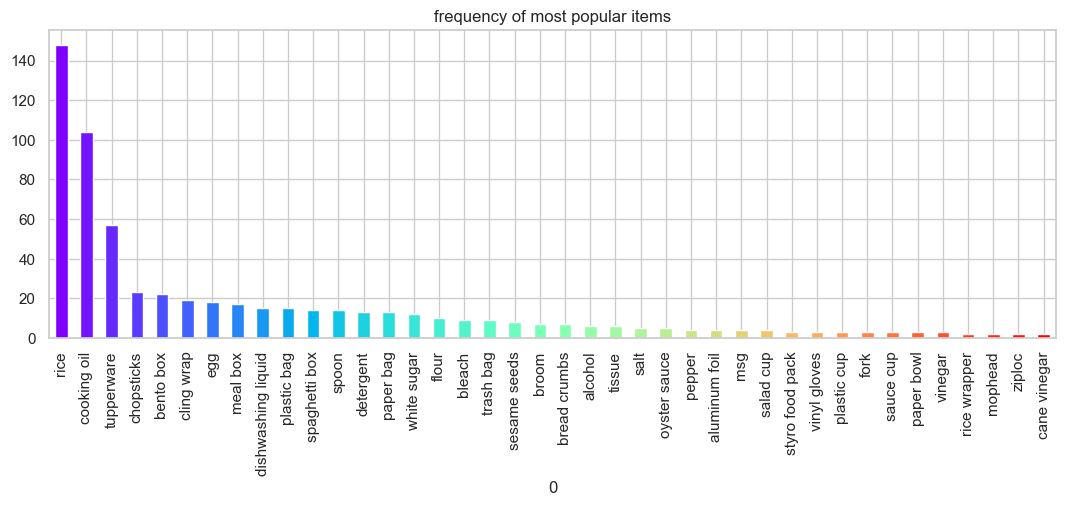

In [30]:
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv', header = None)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,4))
plt.title('frequency of most popular items', fontsize = 12)
plt.xticks(rotation = 90 )
plt.grid('false')
plt.show()

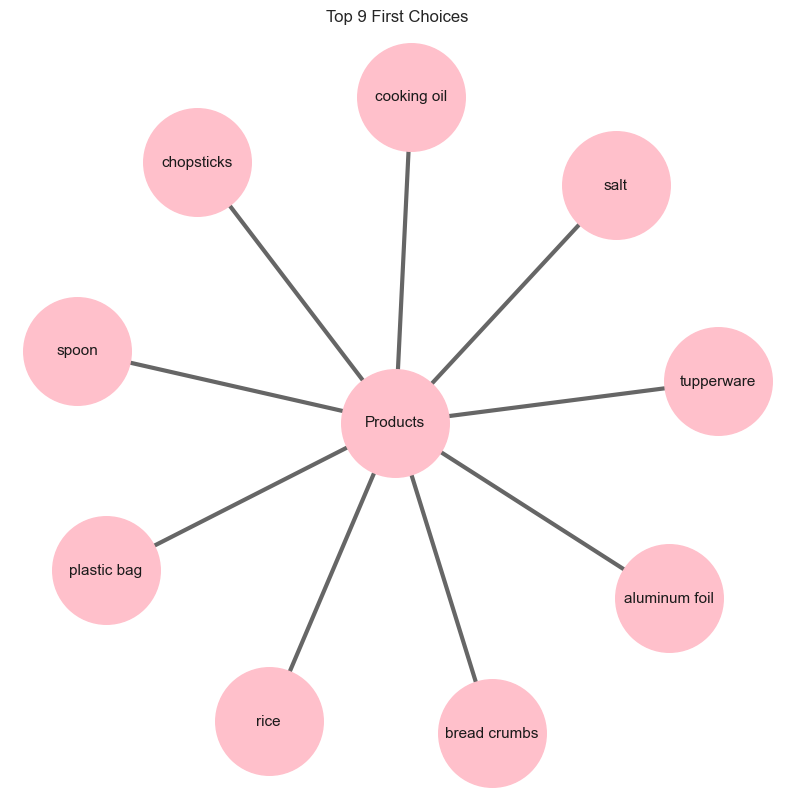

In [31]:
import networkx as nx
data['products'] = 'Products'
products = data.truncate(before = -1, after = 15)
products = nx.from_pandas_edgelist(products, source = 'products', target = 0, edge_attr = True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
pos = nx.spring_layout(products)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(products, pos, node_size = 6000, node_color = 'pink')
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 11, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 9 First Choices', fontsize = 12)
plt.show()

In [32]:
import pandas as pd
df=pd.read_csv("final data set.csv")
df.head()



,Quantity,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,...,item 11,item 12,item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
0,2,chopsticks,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,rice,detergent,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,tupperware,dishwashing liquid,paper straw,gun lighter,mophead,steel wool,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,plastic bag,ice bag,toothpick,sauce cup,rice,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,rice,paper bag,tissue,disposable gloves,toothpick,trash bag,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df1=pd.get_dummies(df)
df2=df1.iloc[:, 1:]
df2.head()

,Item 19,Item 20,item 1_alcohol,item 1_aluminum foil,item 1_aluminum tray,item 1_apron,item 1_bag closer,item 1_bending straw,item 1_bento box,item 1_bleach,...,item 13_trash bag,Item 14_egg,Item 14_fork,Item 14_plastic bag,Item 14_scotch tape,Item 15_cooking oil,Item 15_dishwashing liquid,Item 16_detergent,Item 17_bleach,Item 18_trash bin
0,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
print(df2.isna().sum())
df2 = df2.fillna(0)

Item 19                       649
Item 20                       649
item 1_alcohol                  0
item 1_aluminum foil            0
item 1_aluminum tray            0
                             ... 
Item 15_cooking oil             0
Item 15_dishwashing liquid      0
Item 16_detergent               0
Item 17_bleach                  0
Item 18_trash bin               0
Length: 676, dtype: int64


In [35]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items=apriori(df2,min_support=0.01,use_colnames=True)
frequent_items

,support,itemsets
0,0.033898,(item 1_bento box)
1,0.013867,(item 1_bleach)
2,0.010786,(item 1_bread crumbs)
3,0.010786,(item 1_broom)
4,0.035439,(item 1_chopsticks)
...,...,...
144,0.010786,"(item 4_bleach, item 3_detergent)"
145,0.010786,"(item 4_meal box, item 3_spaghetti box)"
146,0.010786,"(item 3_spoon, item 4_fork)"
147,0.015408,"(item 1_rice, item 2_cooking oil, item 3_spagh..."


In [36]:
rules=association_rules(frequent_items,metric="lift",min_threshold=1)
type(rules)
rules.shape

(70, 10)

In [37]:
for i in range(1, 7):
    prefix = f'item {i}_'
    rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple([item.replace(prefix, '') for item in x]))
    rules['consequents'] = rules['consequents'].apply(lambda x: tuple([item.replace(prefix, '') for item in x]))

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(alcohol,)","(cooking oil,)",0.015408,0.160247,0.010786,0.700000,4.368269,0.008317,2.799178,0.783143
1,"(cooking oil,)","(alcohol,)",0.160247,0.015408,0.010786,0.067308,4.368269,0.008317,1.055645,0.918218
2,"(cooking oil,)","(bleach,)",0.160247,0.043143,0.015408,0.096154,2.228709,0.008495,1.058650,0.656514
3,"(bleach,)","(cooking oil,)",0.043143,0.160247,0.015408,0.357143,2.228709,0.008495,1.306283,0.576167
4,"(cooking oil,)","(detergent,)",0.160247,0.035439,0.018490,0.115385,3.255853,0.012811,1.090373,0.825076
...,...,...,...,...,...,...,...,...,...,...
65,"(rice, dishwashing liquid)","(cooking oil,)",0.016949,0.138675,0.010786,0.636364,4.588889,0.008435,2.368644,0.795567
66,"(cooking oil, dishwashing liquid)","(rice,)",0.010786,0.228043,0.010786,1.000000,4.385135,0.008326,inf,0.780374
67,"(rice,)","(cooking oil, dishwashing liquid)",0.228043,0.010786,0.010786,0.047297,4.385135,0.008326,1.038324,1.000000
68,"(cooking oil,)","(rice, dishwashing liquid)",0.138675,0.016949,0.010786,0.077778,4.588889,0.008435,1.065959,0.907999


In [38]:
'''''
has_trailing_commas = True

while has_trailing_commas:
    # Store the original DataFrame for comparison
    original_rules = rules.copy()

    # Apply the operation to remove trailing commas
    rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple([item.rstrip(',') for item in x]))
    rules['consequents'] = rules['consequents'].apply(lambda x: tuple([item.rstrip(',') for item in x]))

    # Check if there are still trailing commas in any tuple
    has_trailing_commas = (
        any(',' in item for x in rules['antecedents'] for item in x) or
        any(',' in item for x in rules['consequents'] for item in x)
    )

rules
'''''

"''\nhas_trailing_commas = True\n\nwhile has_trailing_commas:\n    # Store the original DataFrame for comparison\n    original_rules = rules.copy()\n\n    # Apply the operation to remove trailing commas\n    rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple([item.rstrip(',') for item in x]))\n    rules['consequents'] = rules['consequents'].apply(lambda x: tuple([item.rstrip(',') for item in x]))\n\n    # Check if there are still trailing commas in any tuple\n    has_trailing_commas = (\n        any(',' in item for x in rules['antecedents'] for item in x) or\n        any(',' in item for x in rules['consequents'] for item in x)\n    )\n\nrules\n"

In [39]:
rules.sort_values('support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,"(cooking oil,)","(rice,)",0.138675,0.228043,0.081664,0.588889,2.582357,0.050040,1.877733,0.711412
14,"(rice,)","(cooking oil,)",0.228043,0.138675,0.081664,0.358108,2.582357,0.050040,1.341854,0.793771
7,"(rice,)","(cooking oil,)",0.072419,0.160247,0.027735,0.382979,2.389935,0.016130,1.360980,0.626984
6,"(cooking oil,)","(rice,)",0.160247,0.072419,0.027735,0.173077,2.389935,0.016130,1.121726,0.692559
51,"(fork,)","(spoon,)",0.024653,0.033898,0.021572,0.875000,25.812500,0.020736,7.728814,0.985556
23,"(spaghetti box,)","(rice,)",0.041602,0.228043,0.021572,0.518519,2.273774,0.012084,1.603295,0.584520
50,"(spoon,)","(fork,)",0.033898,0.024653,0.021572,0.636364,25.812500,0.020736,2.682203,0.994987
22,"(rice,)","(spaghetti box,)",0.228043,0.041602,0.021572,0.094595,2.273774,0.012084,1.058529,0.725691
5,"(detergent,)","(cooking oil,)",0.035439,0.160247,0.018490,0.521739,3.255853,0.012811,1.755848,0.718317
12,"(rice,)","(chopsticks,)",0.228043,0.040062,0.018490,0.081081,2.023909,0.009354,1.044639,0.655356


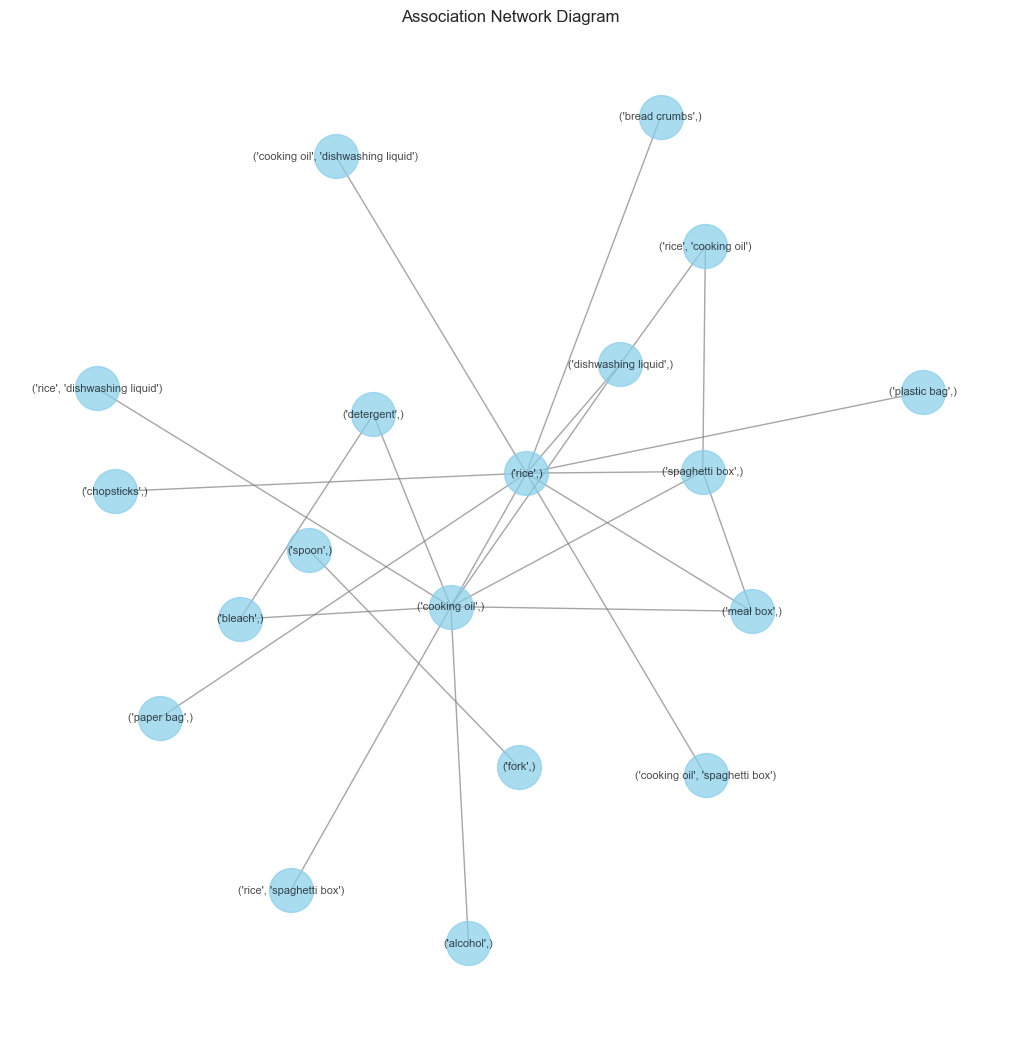

In [40]:
import networkx as nx

G = nx.Graph()
for index, rule in rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=1000, node_color='skyblue', edge_color='gray', width=1, alpha=0.7)
plt.title('Association Network Diagram')
plt.show()


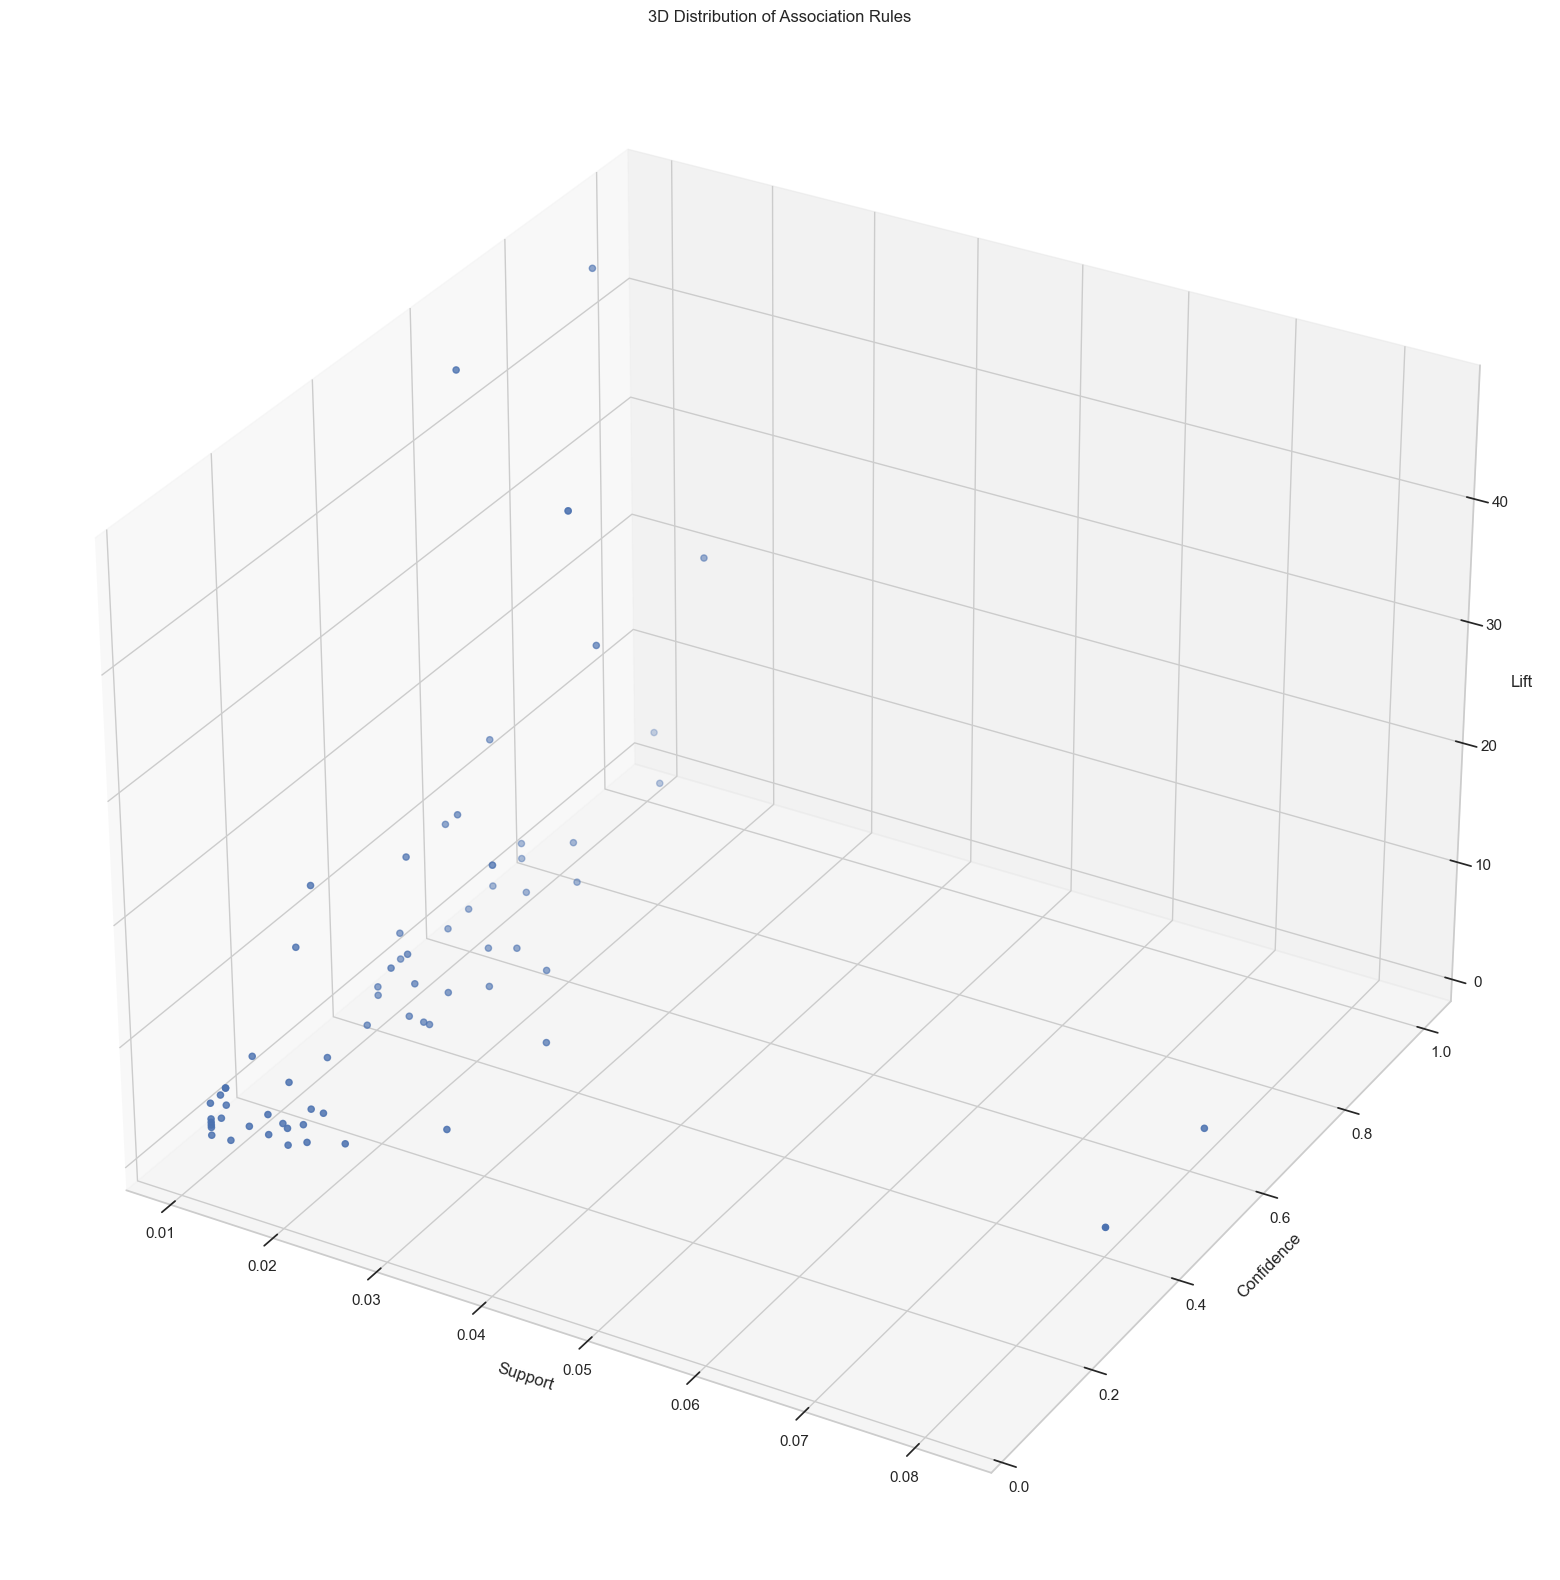

In [41]:
#3D scatter plot. 
#Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(125, 20))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

In [42]:
rules[(rules['lift'] >= 2) &
      (rules['confidence'] >= 0.5) &
      (rules['support'] >= 0.02)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,"(cooking oil,)","(rice,)",0.138675,0.228043,0.081664,0.588889,2.582357,0.050040,1.877733,0.711412
23,"(spaghetti box,)","(rice,)",0.041602,0.228043,0.021572,0.518519,2.273774,0.012084,1.603295,0.584520
50,"(spoon,)","(fork,)",0.033898,0.024653,0.021572,0.636364,25.812500,0.020736,2.682203,0.994987
51,"(fork,)","(spoon,)",0.024653,0.033898,0.021572,0.875000,25.812500,0.020736,7.728814,0.985556


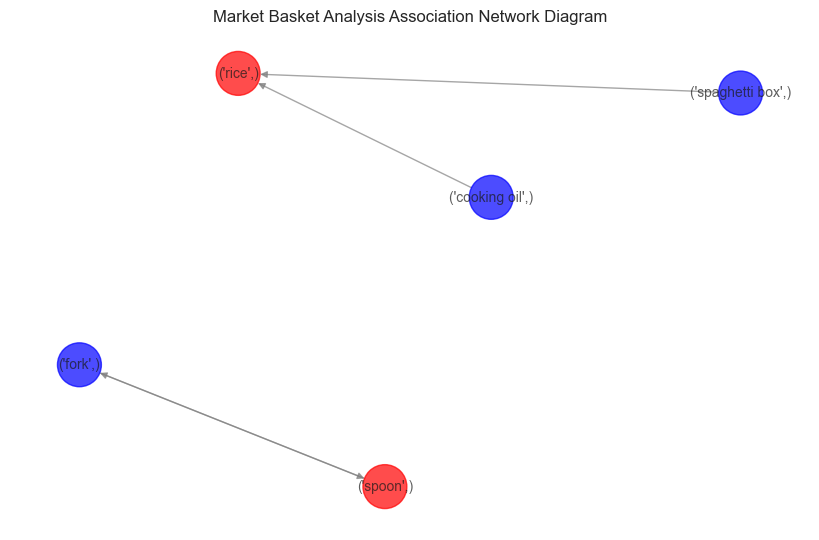

In [43]:
import matplotlib.pyplot as plt

selected_rules = rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.5) & (rules['support'] >= 0.02)]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on the selected rules
for index, rule in selected_rules.iterrows():
    G.add_node(rule['antecedents'], color='blue')
    G.add_node(rule['consequents'], color='red')
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

# Set node colors based on their type (antecedents or consequents)
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Draw the network graph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1000, node_color=node_colors, edge_color='gray', width=1, alpha=0.7)

# Display the graph
plt.title('Market Basket Analysis Association Network Diagram')
plt.show()

